In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [31]:
class KalmanFilter:
    def __init__(self, initial_position, initial_velocity):
            
        self.x = np.array([initial_position, initial_velocity])
        self.P = np.eye(2)

    def predict(self, dt, Q, u):
        # x_{k} = F_{k} x_{k-1} + B_{k} \vec{u_{k}}
        # P_{k} = F_{k} P_{k-1} F_{k}^{T} + Q_{k}
        
        F = np.array([[1, dt], [0, 1]])
        B = np.array([(dt**2)/2, dt])
        new_x = F.dot(self.x) + B.dot(u)
        new_P = F.dot(self.P).dot(F.T) + Q
        
    def update(self, measurement_value, measurement_variance):
        # {K}' = P_{k} H_{k}^{T} (H_{k} P_{k} H_{k}^{T} + R_{k})^{-1}
        # {x_{k}}' = x_{k} + {K}' (\vec{z_{k}} - H_{k} x_{k})
        # {P_{k}}' = P_{k} - {K}' H_{k} P_{k}
    
        H = np.array([1, 0]).reshape((1, 2))

        z = np.array([measurement_value])
        R = np.array([measurement_variance])

        K = self.P.dot(H.T).dot(np.linalg.inv(H.dot(self.P).dot(H.T) + R))
        new_x = self.x + K.dot(z - H.dot(self.x))
        new_P = self.P - K.dot(H).dot(self.P)
        
    @property
    def cov(self) -> np.array:
        return self.P

    @property
    def mean(self) -> np.array:
        return self.x

In [32]:
def main():
    
    u = 1
    Q = 1
    real_position = 0.0
    real_velocity = 0.5
    real_acceleration = 0
    measurement_variance = 0.1 ** 2
    dt = 0.1

    initial_position=0.0
    initial_velocity=1.0,

    MEASURE_EVERY_STEPS = 20
    NUM_STEPS = 1000

    mus = []
    covs = []
    real_positions = []
    real_velocities = []
    
    kerman_filter = KalmanFilter(initial_position=0.0, initial_velocity=1.0)

    for step in range(NUM_STEPS):

        real_position = real_position + dt * real_velocity
        real_velocity = real_velocity + dt * real_acceleration

        covs.append(kerman_filter.cov)
        mus.append(kerman_filter.mean)

        kerman_filter.predict(dt, Q, u)

        if step != 0 and step % MEASURE_EVERY_STEPS == 0:
            kerman_filter.update(
                measurement_value=real_position + np.random.randn() * np.sqrt(measurement_variance),
                measurement_variance=measurement_variance
            )

        real_positions.append(real_position)
        real_velocities.append(real_velocity)


if __name__ == "__main__":
    main()

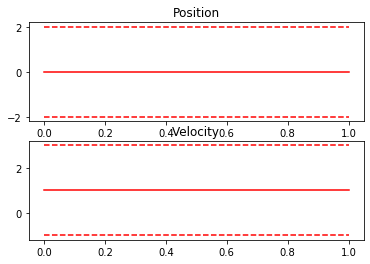

In [34]:
plt.subplot(2, 1, 1)
plt.title('Position')
plt.plot([mu[0] for mu in mus], 'r')
plt.plot(real_positions, 'b')
plt.plot([mu[0] - 2*np.sqrt(cov[0,0]) for mu, cov in zip(mus,covs)], 'r--')
plt.plot([mu[0] + 2*np.sqrt(cov[0,0]) for mu, cov in zip(mus,covs)], 'r--')

plt.subplot(2, 1, 2)
plt.title('Velocity')
plt.plot(real_velocities, 'b')
plt.plot([mu[1] for mu in mus], 'r')
plt.plot([mu[1] - 2*np.sqrt(cov[1,1]) for mu, cov in zip(mus,covs)], 'r--')
plt.plot([mu[1] + 2*np.sqrt(cov[1,1]) for mu, cov in zip(mus,covs)], 'r--')